# TensorFlow (TF) version: 2


Mario Fiorino

Comprese le basi nel notebook precedente, da ora in poi, per implementare una rete neurale, adotteremo una delle librerie di Deep Learning più usate, ossia TensorFlow (sviluppata da Google). Questa offre una serie di strumenti che consentono di semplificare notevolmente il processo di sviluppo e implementazione di reti neurali o più in generale di modelli di Deep Learning.



Ref:

https://www.tensorflow.org/guide


https://www.tensorflow.org/guide/tensor?hl=it

https://www.tensorflow.org/guide/basics


https://github.com/jeffheaton/t81_558_deep_learning




In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

TensorFlow version: 2.15.0


### Presentazione dei concetti basilari

<div>
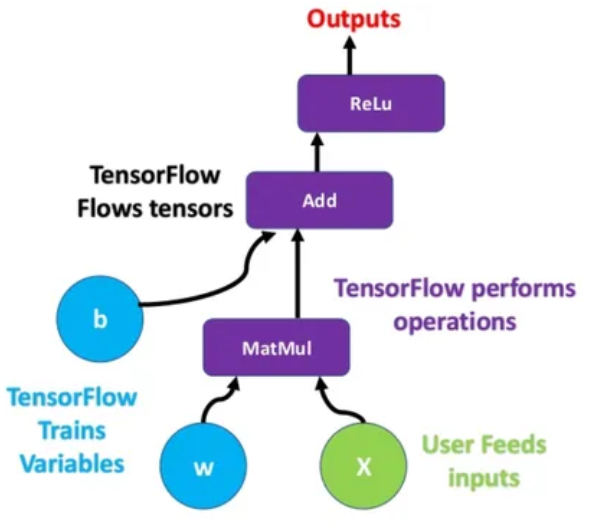
</div>

**Flow Graph**

Sopra un esempio di un Flow Graph che può essere elaborato con TensorFlow. I dati inseriti (feed to)  alla rete neurale  sono rappresentati da un cerchio verde. I cerchi blu indicano i parametri da aggiornare durante il training (w = weight - Variables in TensorFlow). Le operazioni matematiche eseguibili tra i dati sono rappresentate in viola. Le freccie del grafo(edge) raffigurano il flusso dei dati.

####**Sui Tensori**

Un Tensor è un array multidimensionale; caratterizzati da:

- Un'etichetta univoca (name)
- Un contenuto (value)
- Un certo numero di dimensioni(shape)
- Un tipo di dati (dtype)

In [ ]:
## scalare

#intero
value = 4
t1 = tf.constant(value, tf.int16, name = "Esempio1") # NOTA : Il parametro name è facoltativo (puoi creare variabili e costanti con o senza di esso)
print(t1)
print(repr(t1))

#decimale
t1_decimal = tf.constant(1.12345, tf.float32)
print(t1_decimal)
print(repr(t1_decimal))

tf.Tensor(4, shape=(), dtype=int16)
<tf.Tensor: shape=(), dtype=int16, numpy=4>
tf.Tensor(1.12345, shape=(), dtype=float32)
<tf.Tensor: shape=(), dtype=float32, numpy=1.12345>


In [ ]:
## vettore 1D

v1_vector = tf.constant([10, 342, 5], tf.int16)
print(v1_vector)

v2_boolean = tf.constant([True, True, False, True, True], tf.bool)
print(v2_boolean)

tf.Tensor([ 10 342   5], shape=(3,), dtype=int16)
tf.Tensor([ True  True False  True  True], shape=(5,), dtype=bool)


In [ ]:
## matrice 2D
t2_matrix = tf.constant([ [1, 2],
                          [3, 4] ],tf.int16)
print(t2_matrix)



tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int16)


In [ ]:
# vettore 3D, detto a tre assi

rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],]) # in questo caso il compilatore in automatico tipizzarà i dati

print(rank_3_tensor)


tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


<div>
<img src="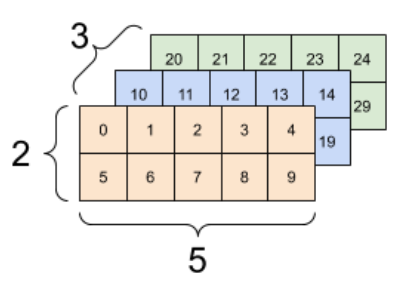
", width="250">
</div>

<div>
<img src="
", width="250">
</div>

In [ ]:
#NOTA la differenza
#scritto come sotto in uscita abbiamo una mtrice 6x5 shape=(6, 5)

rank_2_tensor = tf.constant([
  [0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9],
  [10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19],
  [20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]])

print(rank_2_tensor)

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32)


In [ ]:
# Vettore 4D, rank 4

rank_4_tensor = tf.zeros([3, 2, 4, 5])

print(rank_4_tensor)

tf.Tensor(
[[[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]], shape=(3, 2, 4, 5), dtype=float32)


<div>
<img src="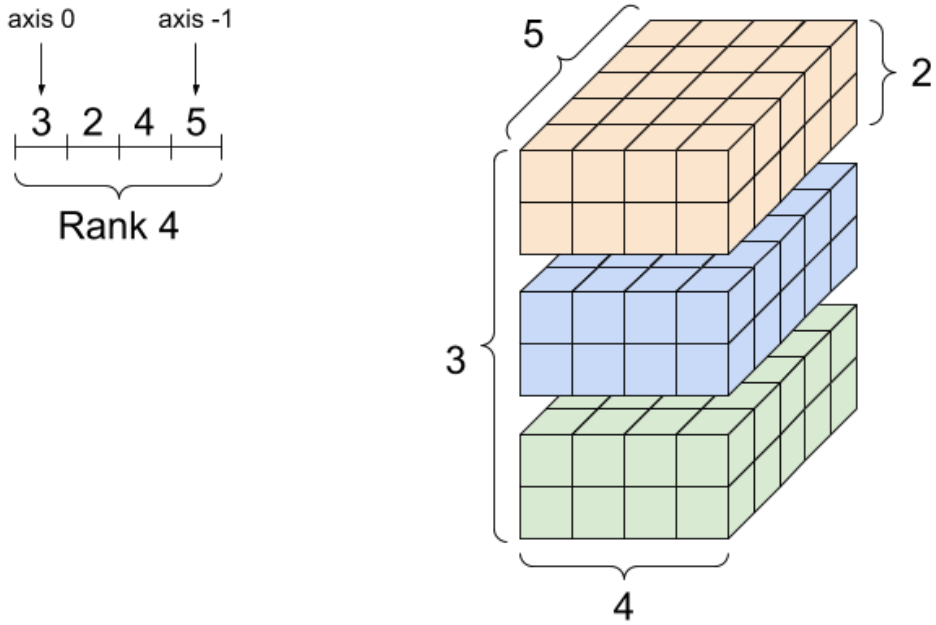
", width="300">
</div>

In [ ]:
# in dettaglio

print("Tipizzazione degli elementi:", rank_4_tensor.dtype)
print("Numero di assi:", rank_4_tensor.ndim)
print("Shape - (Numero di elementi di ciascuno degli assi del tensore):", rank_4_tensor.shape)
print("Elementi lungo l'asse 0 del tensore:", rank_4_tensor.shape[0])
print("Elementi lungo l'ultimo asse del tensore:", rank_4_tensor.shape[-1])
print("Numero di elementi totali, cioè 3*2*4*5 = ", tf.size(rank_4_tensor).numpy())

Tipizzazione degli elementi: <dtype: 'float32'>
Numero di assi: 4
Shape - (Numero di elementi di ciascuno degli assi del tensore): (3, 2, 4, 5)
Elementi lungo l'asse 0 del tensore: 3
Elementi lungo l'ultimo asse del tensore: 5
Numero di elementi totali, cioè 3*2*4*5 =  120


**Compatibilità NumPy**

Si puo convertire un tensore in un array NumPy usando np.array o il metodo tensor.numpy :

In [ ]:
print(np.array(v1_vector))
print("\noppure\n")
# oppure
print(rank_3_tensor.numpy())

[ 10 342   5]

oppure

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]]


**Typecasting**

In [ ]:
itc = v1_vector = tf.constant([342, 5, 0 ,-18 ], tf.int16)
er = tf.cast(itc, dtype=tf.float32)

print(er)

tf.Tensor([342.   5.   0. -18.], shape=(4,), dtype=float32)


**Incidizzazione**

In [ ]:
#https://www.tensorflow.org/guide/tensor_slicing

print(rank_3_tensor)
print("")

nk = rank_3_tensor[:, :, 0]
print(nk)
print("")

nk = nk.numpy()
nk[0][1] = 999
print(nk)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)

tf.Tensor(
[[ 0  5]
 [10 15]
 [20 25]], shape=(3, 2), dtype=int32)

[[  0 999]
 [ 10  15]
 [ 20  25]]


**Trovare l'indice degli elementi di minimo e massimo di un tensore**

In [ ]:
kl = tf.constant([56, 2357, 9, 101, 0, 1, -2, 3])
print("indice in cui trovare il valore minimo del tensore: ", tf.argmin(kl).numpy())
print("indice in cui trovare il valore massimo del tensore: ", tf.argmax(kl).numpy())

indice in cui trovare il valore minimo del tensore:  6
indice in cui trovare il valore massimo del tensore:  1


**Rimodellare un tensore**

tf.reshape(t, [ , ])

A partire da un tensore, questa funzione genera un nuovo tensore con gli stessi valori e lo stesso ordine, ma con una forma(shape) diversa specificata dalle parentesi quadre

In [ ]:
x = tf.constant([[1], [2], [3]])
print(x) # tre righe ed un colonna
#print(x.shape)

reshaped = tf.reshape(x, [1, 3])
print(reshaped) # una riga e tre colonne
print("")

x = tf.constant([[1,2,3],[4,5,6]])
print(x)
res = tf.reshape(x,[6,1])
print(res)

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32)
tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]], shape=(6, 1), dtype=int32)


In [ ]:
#Un `-1` passato nell'argomento `shape` dice "finche non riempi la dimensione".
print(tf.reshape(x, [-1]))
print("")
print(tf.reshape(x, [3, -1]))
print("")
print(tf.reshape(x, [-1, 3]))
print("")
print(tf.reshape(x, [-1, 1]))
print("")
print(tf.reshape(x, [6, -1]))
print(" - Sono uguali gli ultimi due tensori : ", tf.math.reduce_all(tf.equal(tf.reshape(x, [6, -1]) , tf.reshape(x, [-1, 1]))).numpy() )
print("")
print(tf.reshape(x, [2,3, -1]))
print("")

tf.Tensor([1 2 3 4 5 6], shape=(6,), dtype=int32)

tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)

tf.Tensor(
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]], shape=(6, 1), dtype=int32)

tf.Tensor(
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]], shape=(6, 1), dtype=int32)
 - Sono uguali gli ultimi due tensori :  True

tf.Tensor(
[[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]], shape=(2, 3, 1), dtype=int32)



In [ ]:
# Transposta di una matrice
kg = tf.constant([[10 , 11],[0 , 0],[6, 9]])
print(kg)
print("Inversione riga colonna:\n", tf.transpose(kg))

tf.Tensor(
[[10 11]
 [ 0  0]
 [ 6  9]], shape=(3, 2), dtype=int32)
Inversione riga colonna:
 tf.Tensor(
[[10  0  6]
 [11  0  9]], shape=(2, 3), dtype=int32)


In [ ]:
# Concatenazione di due matrici

x1 = tf.constant([[10 , 11],[0 , 0],[6, 9]])
y1 = tf.constant([[1 , 1],[5 , 5],[33, 34]])

print("Concatena per riga:")
print(tf.concat([x1, y1], 0).numpy())

print("\nConcatena per colonna")
print(tf.concat([x1, y1], 1).numpy())

print("\nStack:")
print(x1)
print(tf.stack(x1, axis=1).numpy())

Concatena per riga:
[[10 11]
 [ 0  0]
 [ 6  9]
 [ 1  1]
 [ 5  5]
 [33 34]]

Concatena per colonna
[[10 11  1  1]
 [ 0  0  5  5]
 [ 6  9 33 34]]

Stack:
tf.Tensor(
[[10 11]
 [ 0  0]
 [ 6  9]], shape=(3, 2), dtype=int32)
[[10 11]
 [ 0  0]
 [ 6  9]]


**Operazioni matematiche**

In [ ]:
#Addizione
print("Addizione")
print(tf.add(1, 5))
r = tf.add(1,5)
print(r.numpy())
print("")

x = tf.constant([[1,2,3],[4,5,6]])
print(tf.add(x, x))
print((tf.add(x, x))+100)
print("")

#Multiplicazione
print("Multiplicazione")
y =  tf.constant([[10 , 11, 12],[0 , 0, 0]])
product = tf.multiply(x,y)
print(product)

#Divisione
print("\nDivisione")
division = tf.divide(x,[1 , 2, 1])
print(division)

#Eleva al Quadrato
print("\nAl Quadrato")
print(tf.square(x))


#Sommare gli elementi di un tensore
print("\nSommare tutti gli elementi")
print("Inpunt: ",x)
s = tf.reduce_sum(x)
print(s)
print("Somma lungo la prima dimensione")
print(tf.reduce_sum(x, 0))
print("Somma lungo la seconda dimensione")
print(tf.reduce_sum(x, 1))

#Overloading degli operatori
print("\nOverloading")
print(tf.square(2) + tf.reduce_sum(x) +  tf.multiply([[1,1,1],[1,1,3]],10) )


#Squared Difference
print("\nDifferenza quadratica")
z =  tf.constant([[1 , 1, 1],[0 , 0, 0]])
print(tf.math.squared_difference(x,z).numpy())

Addizione
tf.Tensor(6, shape=(), dtype=int32)
6

tf.Tensor(
[[ 2  4  6]
 [ 8 10 12]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[102 104 106]
 [108 110 112]], shape=(2, 3), dtype=int32)

Multiplicazione
tf.Tensor(
[[10 22 36]
 [ 0  0  0]], shape=(2, 3), dtype=int32)

Divisione
tf.Tensor(
[[1.  1.  3. ]
 [4.  2.5 6. ]], shape=(2, 3), dtype=float64)

Al Quadrato
tf.Tensor(
[[ 1  4  9]
 [16 25 36]], shape=(2, 3), dtype=int32)

Sommare tutti gli elementi
Inpunt:  tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
tf.Tensor(21, shape=(), dtype=int32)
Somma lungo la prima dimensione
tf.Tensor([5 7 9], shape=(3,), dtype=int32)
Somma lungo la seconda dimensione
tf.Tensor([ 6 15], shape=(2,), dtype=int32)

Overloading
tf.Tensor(
[[35 35 35]
 [35 35 55]], shape=(2, 3), dtype=int32)

Differenza quadratica
[[ 0  1  4]
 [16 25 36]]


**Prodotto riga colonna**

https://en.wikipedia.org/wiki/Matrix_multiplication

In [ ]:
x = tf.constant([[9 , 10]])

W = tf.constant([[1 , 0, 5],[0 , 2, 7]])

y = tf.matmul(x, W)
# u1 = x1*w11 + x2*w21
# u2 = x1*w12 + x2*w22
# u3 = x1*w13 + x2*w23

print(x,"\n\n",W,"\n\n",y)

tf.Tensor([[ 9 10]], shape=(1, 2), dtype=int32) 

 tf.Tensor(
[[1 0 5]
 [0 2 7]], shape=(2, 3), dtype=int32) 

 tf.Tensor([[  9  20 115]], shape=(1, 3), dtype=int32)


**Calcolare i valori medi**

In [ ]:
idr = tf.constant([1,2,3,4,5], tf.float32) # riga

print("Valore Medio sul vettore 1D:",tf.reduce_mean(input_tensor=idr).numpy().round(2))

idr2 = tf.reshape(idr, [-1, 1]) # colonna

print("Valore Medio sul vettore 1D:",tf.reduce_mean(input_tensor=idr2).numpy().round(2))

print("")

mx = tf.constant([[1,2,3],[1,5,1],[1,0,9]], tf.float32)

print("Valore medio sul tutti gli elementi della matrice:",tf.reduce_mean(input_tensor=mx).numpy().round(2))
print("Media sulle righe:",tf.reduce_mean(input_tensor=mx, axis=0).numpy().round(2))
print("Media sulle colonna:",tf.reduce_mean(input_tensor=mx, axis=1).numpy().round(2))

Valore Medio sul vettore 1D: 3.0
Valore Medio sul vettore 1D: 3.0

Valore medio sul tutti gli elementi della matrice: 2.56
Media sulle righe: [1.   2.33 4.33]
Media sulle colonna: [2.   2.33 3.33]


**Campiona valori da una distribuzione normale:**

In [ ]:
gs = tf.random.normal(shape=(5,2), mean=4.0, stddev=1.0).numpy().round(2)
print(gs)

[[4.7  5.19]
 [4.97 4.98]
 [5.52 3.59]
 [4.42 5.85]
 [3.62 5.04]]


**Campiona valori da una distribuzione uniforme:**

In [ ]:
du = tf.random.uniform(shape = (3,7),  minval=0, maxval=99, dtype=tf.int32).numpy()

print(du)

[[ 1 10 74 76 78 42 84]
 [37 34 44 10 60 74 71]
 [68 59 56  2 43 22 51]]


**Matrice di identità**

In [ ]:
im = tf.eye(5)
print(im.numpy())

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


**Calcolare la probabilità Softmax**

In [ ]:
xs = tf.constant([1., 4.1, 4., 7.6, 0., 9])

print(tf.nn.softmax(xs).numpy().round(3))

[0.    0.006 0.005 0.196 0.    0.793]


**Vettori composti da 0 oppure 1**

In [ ]:
zx = tf.zeros([2,5])
print(zx)
ox= tf.ones([2,5])
print(ox)

print("")
print(du)
print("Stesso dimensioni ma contenuto da zeri:\n", tf.zeros_like(du))

tf.Tensor(
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]], shape=(2, 5), dtype=float32)
tf.Tensor(
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]], shape=(2, 5), dtype=float32)

[[ 1 10 74 76 78 42 84]
 [37 34 44 10 60 74 71]
 [68 59 56  2 43 22 51]]
Stesso dimensioni ma contenuto da zeri:
 tf.Tensor(
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]], shape=(3, 7), dtype=int32)


**Normalizza i valori del tensore lungo l'asse dimensionale scelto utilizzando una norma L2**

$\hat x_{i} = \frac{x_{i}}{\sqrt{\sum_{i=1} ^d x_{i}^2} \; + \; ε} $

$ε$ è una piccola costante (in genere dell'ordine di  $10^{-12}$) utilizzata per evitare la divisione per zero.

In [ ]:
xn = tf.constant([[1., 5., 1.], [0., 0., 9.],[1., 2., 3.]])
print(tf.math.l2_normalize(xn,axis=1, epsilon=1e-12).numpy())


[[0.19245009 0.9622505  0.19245009]
 [0.         0.         1.        ]
 [0.26726124 0.5345225  0.8017837 ]]


####Hardware: Dovrei usare la CPU o la GPU?

Il codice TF può essere eseguito su più piattaforme.

Le CPU sono generalmente preferite alle GPU per attività non parallelizzabili, come compiti sequenziali non banali. Ad esempio, le RNN (reti neurali ricorrenti) dove il calcolo di ogni termine successivo richiede il risultato del termine precedente.

Se possibile suddividere l'attività principale in più sotto-attività indipendenti ed eseguirle in parallelo, le GPU offrono prestazioni migliori rispetto alle CPU. Ad esempio, le CNN (reti neurali convoluzionali) sfruttano molto bene le GPU.

Tuttavia, la questione non è così semplice, sebbene le RNN non siano intrinsecamente parallelizzabili, è possibile migliorarne le prestazioni attraverso le GPU con alcuni sofisticati accorgimenti.


Attualmente, in generale, l'utilizzo di una GPU potente è consigliabile per l'esecuzione di qualsiasi tipo di rete neurale.

**Uso della GPU**

Molte operazioni di TensorFlow sfruttano la GPU per l'accelerazione del calcolo. In assenza di specifiche annotazioni, TensorFlow decide autonomamente se utilizzare la GPU o la CPU per ogni operazione.

In [ ]:
x = tf.random.uniform([3, 3])

print("Is there a GPU available: "),
print(tf.config.list_physical_devices("GPU"))

print("Is the Tensor on GPU #0:  "),
print(x.device.endswith('GPU:0'))

Is there a GPU available: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Is the Tensor on GPU #0:  
True


In [ ]:
# in TensorFlow, il posizionamento consente la collocazione delle singole operazioni
#  su un device (CPU o GPU)specifico per l'esecuzione

import time

def time_matmul(x):
  start = time.time()
  for loop in range(10):
    tf.matmul(x, x)

  result = time.time()-start

  print("10 loops: {:0.2f}ms".format(1000*result))

# Forza l'esecuzione sulla CPU
print("On CPU:")
with tf.device("CPU:0"):
  x = tf.random.uniform([1000, 1000])
  assert x.device.endswith("CPU:0")
  time_matmul(x)

# Forza l'esecuzione sulla GPU #0 se disponibile
if tf.config.list_physical_devices("GPU"): # verifica disponibilità se "True"
  print("On GPU:")
  with tf.device("GPU:0"): # Or GPU:1 for the 2nd GPU, GPU:2 for the 3rd etc.
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)

On CPU:
10 loops: 181.91ms
On GPU:
10 loops: 1.00ms


####**Variabili**

Quando i dati assumono sempre valori diversi. Per gestire questa variabilità, è possibile utilizzare la classe Variable.

Le variabili in TensorFlow:

Rappresentano nodi computazionali con valori che cambiano durante l'esecuzione del modello.

Vengono utilizzate per creare parametri del modello, come matrici di "weights"

In [12]:
W = tf.Variable( (tf.random.uniform((2,5), -1, 1 ) ))
b = tf.Variable( tf.zeros((10,)) )
print(W,"\n\n",b)

<tf.Variable 'Variable:0' shape=(2, 5) dtype=float32, numpy=
array([[ 0.78407025,  0.30339003, -0.65945935,  0.5531242 , -0.53112674],
       [ 0.99803877,  0.24565911,  0.20411682,  0.32207203,  0.41675615]],
      dtype=float32)> 

 <tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>


In [14]:
#Per maggiori info su tf.Variable.assign()
#https://www.tensorflow.org/guide/variable?hl=it
W.assign( np.arange(10).reshape(2,5) )
b.assign([6,0,3,43,56,7,5,9,45,10])
print(W,"\n\n",b)

<tf.Variable 'Variable:0' shape=(2, 5) dtype=float32, numpy=
array([[0., 1., 2., 3., 4.],
       [5., 6., 7., 8., 9.]], dtype=float32)> 

 <tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=array([ 6.,  0.,  3., 43., 56.,  7.,  5.,  9., 45., 10.], dtype=float32)>


In [5]:
np.arange(10).reshape(2,5)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

### Appendice: NumPy Quick Tutorial

In [11]:
#Crea un array
array2D = np.array([[1, 0], [7, 70], [4, 8]])
print(array2D)
print("")

#Popolare un array :
print("Popolare un vettore 1D:")
s1D = np.arange(start=1, stop=10, step=1)
print(s1D)
print("")
print("Popolare una matrice:")
s2D = np.arange(10).reshape(2,5)
print(s2D)
print("\n---")
print("---")
print("\n Uso di np.random")
ri2D = np.random.randint(low=9, high=101, size=(3,9))
print(ri2D)
print("--")
r3D = np.random.random((2,5,3))
print(r3D)
print("\nAggiungi +2.0 a tutti gli elementi dell'array precedente")
print(r3D + 2.0)

[[ 1  0]
 [ 7 70]
 [ 4  8]]

Popolare un vettore 1D:
[1 2 3 4 5 6 7 8 9]

Popolare una matrice:
[[0 1 2 3 4]
 [5 6 7 8 9]]

---
---

 Uso di np.random
[[43 88 48 48 60 86 22 35 45]
 [14 58 11 88 78 10 41 67 30]
 [38 75 99 12 13 56 84 33 71]]
--
[[[0.77134498 0.49419839 0.99183209]
  [0.70306163 0.3091302  0.84008202]
  [0.09206452 0.77024213 0.94591572]
  [0.94715472 0.22122196 0.23484159]
  [0.0414235  0.03297073 0.74785832]]

 [[0.0138868  0.66317294 0.00868072]
  [0.09343991 0.48568586 0.43777027]
  [0.16924442 0.67063276 0.92887744]
  [0.60021643 0.07505086 0.56931913]
  [0.32136648 0.7215269  0.2364702 ]]]

Aggiungi +2.0 a tutti gli elementi dell'array precedente
[[[2.77134498 2.49419839 2.99183209]
  [2.70306163 2.3091302  2.84008202]
  [2.09206452 2.77024213 2.94591572]
  [2.94715472 2.22122196 2.23484159]
  [2.0414235  2.03297073 2.74785832]]

 [[2.0138868  2.66317294 2.00868072]
  [2.09343991 2.48568586 2.43777027]
  [2.16924442 2.67063276 2.92887744]
  [2.60021643 2.07505086 